<a href="https://colab.research.google.com/github/2025-02-FML-team/WV-Team/blob/data_augment/05-1_new_model_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import shutil
from pathlib import Path

try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    DATA_DIR = Path('/content/unpacked/')
    PACK_DIR = Path('/content/drive/My Drive/colab_drive/prepacked.zip')
    shutil.copy(PACK_DIR, '/content/')
    !unzip -o -q /content/prepacked.zip -d {DATA_DIR}
else:
    DATA_DIR= Path(os.path.join(os.getcwd(), "../data/")).resolve()
DATA_DIR

PosixPath('/workspace/WV-Team/data')

In [2]:
import pandas as pd
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# CSV 로드 및 정리, 본인 경로에 맞게 변환
CSV_PATH = DATA_DIR / 'kfold_result_class.csv'
IMAGE_SIZE = (256, 256)

2025-11-23 18:27:42.658286: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
df = pd.read_csv(CSV_PATH, dtype={"id": str})
# 모델 이름을 x축 인덱스로 사용
x = range(len(df))
names = df["name"]
f
df.head()

,Unnamed: 0,name,acc_mean,acc_std,prec_macro_mean,prec_macro_std,best_f1_macro_mean,best_f1_macro_std,last_f1_macro_mean,last_f1_macro_std
0,5,hl200x2,0.543133,0.007175,0.535630,0.017408,0.521618,0.015233,0.511623,0.012777
1,4,hl400x2,0.540812,0.015357,0.530896,0.018572,0.517823,0.005596,0.510663,0.011749
2,11,cld16_32_64,0.537331,0.012737,0.542202,0.012502,0.513639,0.009467,0.506462,0.012569
3,2,hl300x3,0.532689,0.015503,0.538928,0.025084,0.508318,0.018231,0.496925,0.017756
4,10,cl48_96_192,0.532689,0.014557,0.522111,0.009873,0.507969,0.002480,0.497796,0.008356


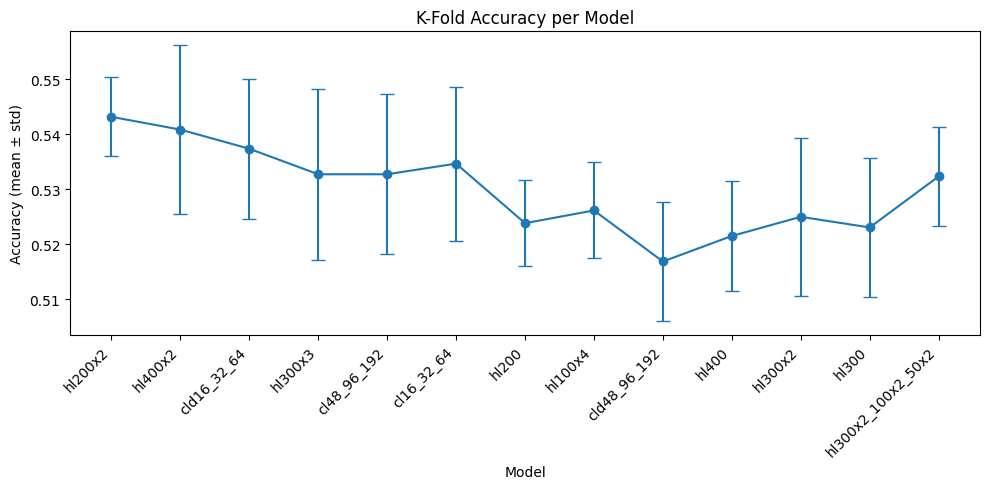

In [13]:
# 1) Accuracy
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["acc_mean"], yerr=df["acc_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy (mean ± std)")
plt.title("K-Fold Accuracy per Model")
plt.tight_layout()
plt.show()

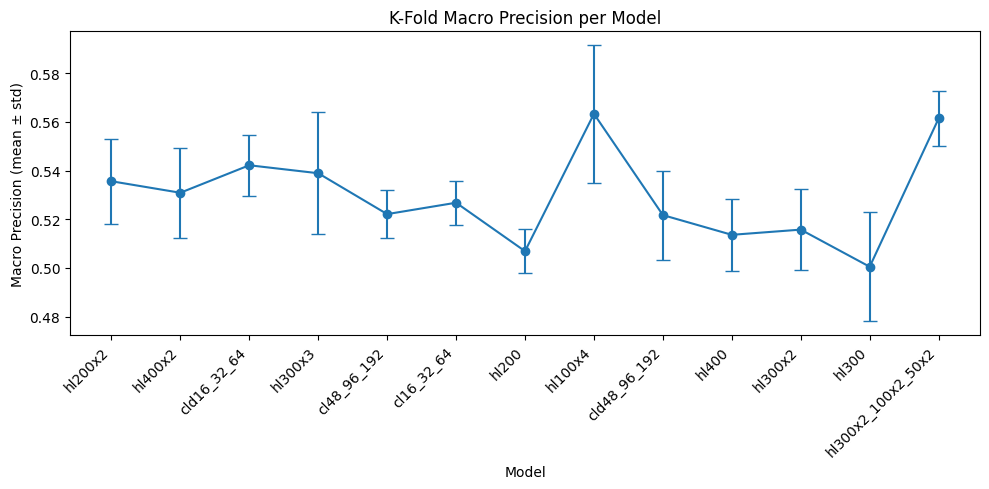

In [14]:
# 2) Macro Precision plot 
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["prec_macro_mean"], yerr=df["prec_macro_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Macro Precision (mean ± std)")
plt.title("K-Fold Macro Precision per Model")
plt.tight_layout()
plt.show()

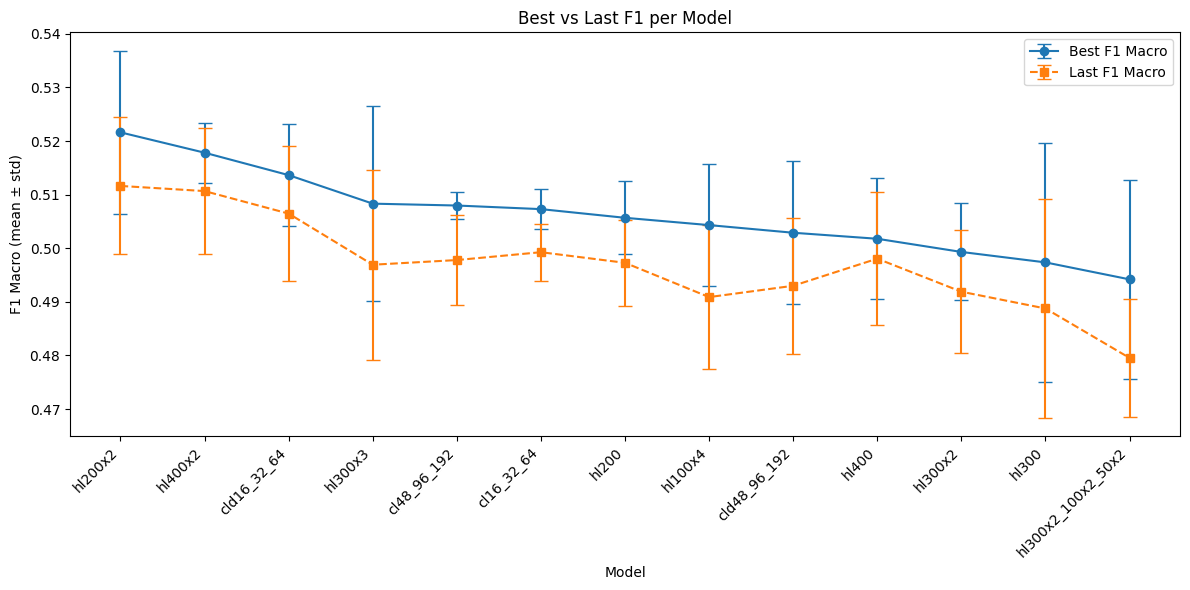

In [15]:
# 3) Best F1 vs Last F1 plot 
plt.figure(figsize=(12, 6))
plt.errorbar(
    x, df["best_f1_macro_mean"], yerr=df["best_f1_macro_std"],
    fmt='o-', capsize=5, label="Best F1 Macro"
)
plt.errorbar(
    x, df["last_f1_macro_mean"], yerr=df["last_f1_macro_std"],
    fmt='s--', capsize=5, label="Last F1 Macro"
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("F1 Macro (mean ± std)")
plt.title("Best vs Last F1 per Model")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
CSV_PATH_2 = DATA_DIR / 'kfold_result_input.csv'

In [17]:
df = pd.read_csv(CSV_PATH_2, dtype={"id": str})
# 모델 이름을 x축 인덱스로 사용
x = range(len(df))
names = df["name"]

df.head()

,Unnamed: 0,name,acc_mean,acc_std,prec_macro_mean,prec_macro_std,best_f1_macro_mean,best_f1_macro_std,last_f1_macro_mean,last_f1_macro_std
0,3,id224x336,0.530204,0.015296,0.525065,0.018379,0.515298,0.016560,0.503272,0.012275
1,2,id256x384,0.515416,0.021094,0.504169,0.022116,0.492634,0.024869,0.484855,0.024319
2,1,id336x224,0.461210,0.120845,0.468711,0.081118,0.492225,0.012477,0.425649,0.128623
3,0,id384x256,0.519512,0.019123,0.509456,0.034301,0.490849,0.023655,0.482758,0.027319


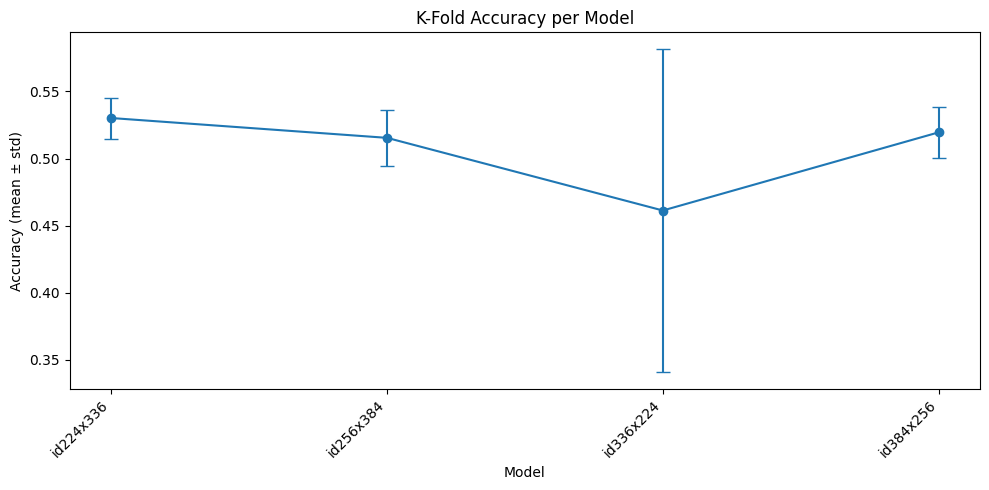

In [18]:
# 1) Accuracy
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["acc_mean"], yerr=df["acc_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Accuracy (mean ± std)")
plt.title("K-Fold Accuracy per Model")
plt.tight_layout()
plt.show()

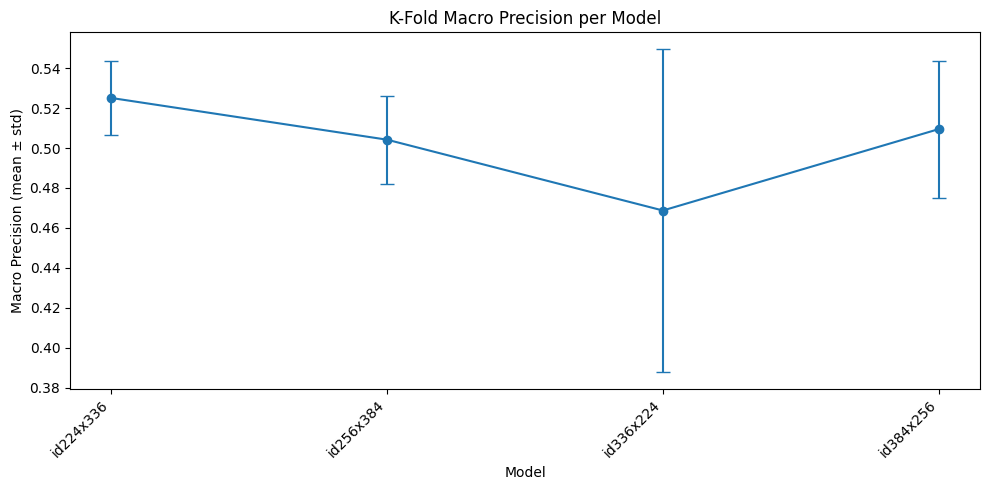

In [19]:
# 2) Macro Precision plot 
plt.figure(figsize=(10, 5))
plt.errorbar(
    x, df["prec_macro_mean"], yerr=df["prec_macro_std"],
    fmt='o-', capsize=5
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("Macro Precision (mean ± std)")
plt.title("K-Fold Macro Precision per Model")
plt.tight_layout()
plt.show()

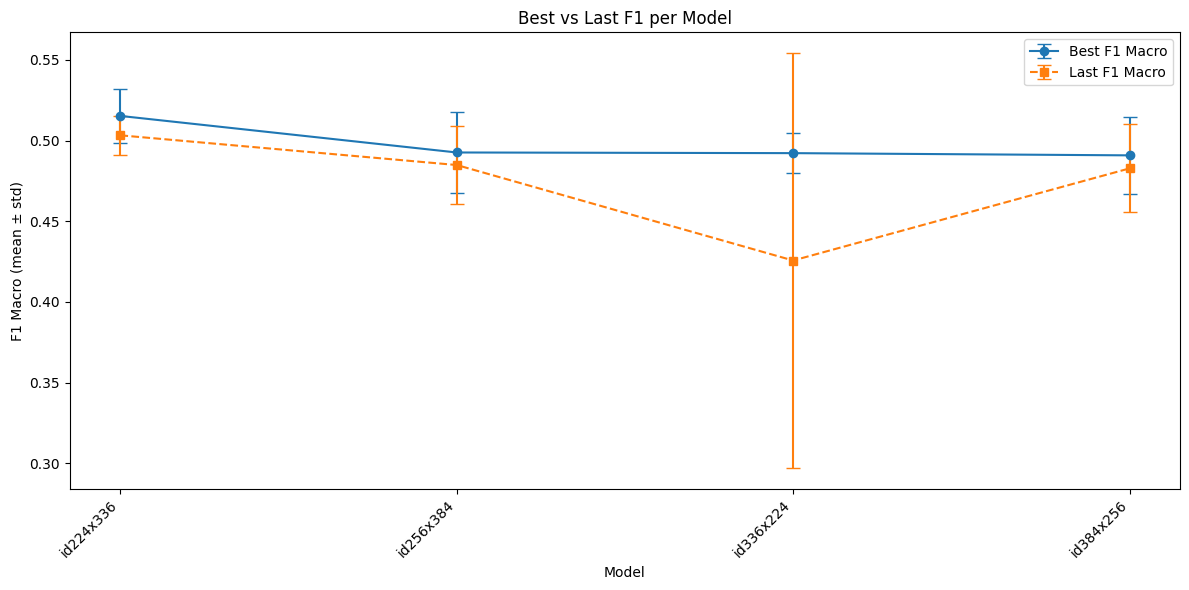

In [20]:
# 3) Best F1 vs Last F1 plot 
plt.figure(figsize=(12, 6))
plt.errorbar(
    x, df["best_f1_macro_mean"], yerr=df["best_f1_macro_std"],
    fmt='o-', capsize=5, label="Best F1 Macro"
)
plt.errorbar(
    x, df["last_f1_macro_mean"], yerr=df["last_f1_macro_std"],
    fmt='s--', capsize=5, label="Last F1 Macro"
)
plt.xticks(x, names, rotation=45, ha="right")
plt.xlabel("Model")
plt.ylabel("F1 Macro (mean ± std)")
plt.title("Best vs Last F1 per Model")
plt.legend()
plt.tight_layout()
plt.show()